In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import math
from scipy.optimize import curve_fit
import glob
import os
import os.path
import matplotlib.backends.backend_pdf

In [17]:
def black_body_flux(time, v, alpha, beta):
    sigma = 5.67e-8 #watt/m2/K4
    c = 2.98e8 #km/s
    v = v*c
    t_days = time/(3600.0*24.0)
    Temp = 5000.0*alpha*np.power(t_days, -1.0*beta) # 5000 just to keep alpha within reasonable limits
    
    Flux= np.zeros_like(time)
    Flux = sigma*np.pi*time*time*v*v*np.power(Temp, 4)
    return Flux
    

In [18]:
f = open('Photometry_data.dat', 'r')
mjd = []
band = []
fl = []
efl = []
mag = []
dmag = []
mag_bol = []

for line in f.readlines():
    row = line.strip()
    if not row.startswith("#"):
        row = line.strip()
        columns = row.split()
        mjd.append(float(columns[0]))
        band.append(columns[1])
        fl.append(float(columns[2]))
        efl.append(float(columns[3]))
        mag.append(float(columns[4]))
        dmag.append(float(columns[4]))
        
ind_g = []
mag_g = []
mjd_g = []
for ind in range (0,len(band)-1):
    if(band[ind] == 'g'):
        ind_g.append(ind)
        mag_g.append(mag[ind])
        mjd_g.append(mjd[ind])
        
mag_g = np.array(mag_g)
mjd_g = np.array(mjd_g)

#mag_g = mag[ind_g]
mag_bol = mag_g - 0.1*np.ones_like(mag_g)
mag_bol_abs = mag_bol - 5.0*np.log10(4e7/10)
L_bol = np.power(10, (mag_bol - 71.2*np.ones_like(mag_bol))/(-2.5) )
#mjd_g = mjd[ind_g]
days_g = mjd_g - 57983.0*np.ones_like(mjd_g)
time = days_g*3600*24 # in seconds

In [19]:
print(mag_bol)

[ 18.564  20.109  20.828  21.631  21.934  21.982  23.176]


In [20]:
#time = np.arange(0,13*3600*24, 1000)
#v = 1e8 #m/s
#T = 5000*np.ones_like(time) #K

popt, pcov = curve_fit(black_body_flux, time, L_bol, bounds=(0, [0.9, 1e8, 10]))

In [21]:
print(popt)

[  2.14189680e-08   2.37988049e+00   9.90308447e-01]


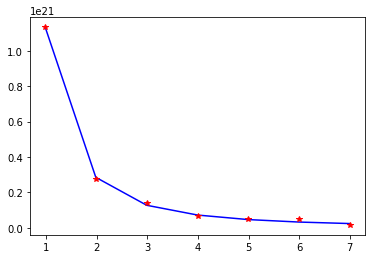

In [23]:
plt.plot(time/(3600*24), black_body_flux(time,*popt), 'b')
plt.plot(time/(3600*24), L_bol, 'r*')

plt.show()